# Model Training & Comparison - Hotel Reservations

Training and comparing Logistic Regression, Random Forest, and XGBoost models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

## 1. Load and Prepare Data

In [ ]:
# Load encoded dataset
df = pd.read_csv('Hotel_Reservations_Label_Encoded.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
df.head()

Dataset shape: (36275, 23)

Columns: ['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status', 'booking_status_encoded', 'type_of_meal_plan_label', 'room_type_reserved_label', 'market_segment_type_label']


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking_status_encoded,type_of_meal_plan_label,room_type_reserved_label,market_segment_type_label
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,0,65.00,0,Not_Canceled,0,0,0,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,106.68,1,Not_Canceled,0,3,0,4
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,0,60.00,0,Canceled,1,0,0,4
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,0,100.00,0,Canceled,1,0,0,4
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,94.50,0,Canceled,1,3,0,4


In [ ]:
# Prepare features and target
# Select only numerical features (including label-encoded categorical features)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove ID and target columns
features_to_remove = ['Booking_ID', 'booking_status_encoded']
feature_cols = [col for col in numerical_cols if col not in features_to_remove]

X = df[feature_cols]
y = df['booking_status_encoded']

print(f"Features: {X.shape[1]}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"Samples: {len(X)}")
print(f"\nClass distribution:")
print(y.value_counts())

Features: 17

Feature columns: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_label', 'room_type_reserved_label', 'market_segment_type_label']
Samples: 36275

Class distribution:
booking_status_encoded
0    24390
1    11885
Name: count, dtype: int64


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (29020, 17)
Test set: (7255, 17)


In [ ]:
# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled successfully!")

Features scaled successfully!


## 2. Model 1: Logistic Regression

In [ ]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression trained successfully!")

Logistic Regression trained successfully!


## 3. Model 2: Random Forest

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest trained successfully!")

Random Forest trained successfully!


## 4. Model 3: XGBoost

In [ ]:
# Calculate scale_pos_weight for XGBoost
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Scale pos weight: {scale_pos_weight:.2f}")

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=scale_pos_weight, n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost trained successfully!")

Scale pos weight: 2.05
XGBoost trained successfully!


## 5. Performance Comparison

In [ ]:
# Calculate metrics for all models
models = {
    'Logistic Regression': (y_pred_lr, y_pred_proba_lr),
    'Random Forest': (y_pred_rf, y_pred_proba_rf),
    'XGBoost': (y_pred_xgb, y_pred_proba_xgb)
}

results = []
for name, (y_pred, y_pred_proba) in models.items():
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    })

results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(results_df.to_string(index=False))


MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.780289   0.634398 0.777451  0.698677 0.862481
      Random Forest  0.906685   0.889194 0.816996  0.851568 0.958054
            XGBoost  0.885045   0.801721 0.862432  0.830969 0.955373


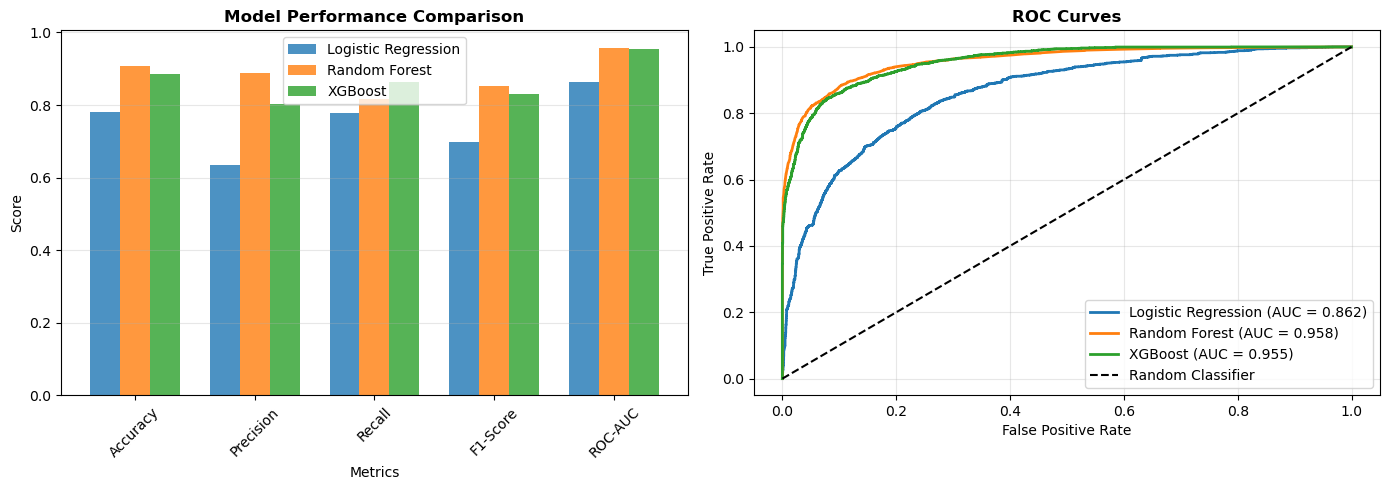

In [ ]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.25

for i, model in enumerate(results_df['Model']):
    values = results_df.iloc[i][metrics].values
    axes[0].bar(x + i*width, values, width, label=model, alpha=0.8)

axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison', fontweight='bold')
axes[0].set_xticks(x + width)
axes[0].set_xticklabels(metrics, rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# ROC curves
for name, (_, y_pred_proba) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    axes[1].plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Confusion Matrices

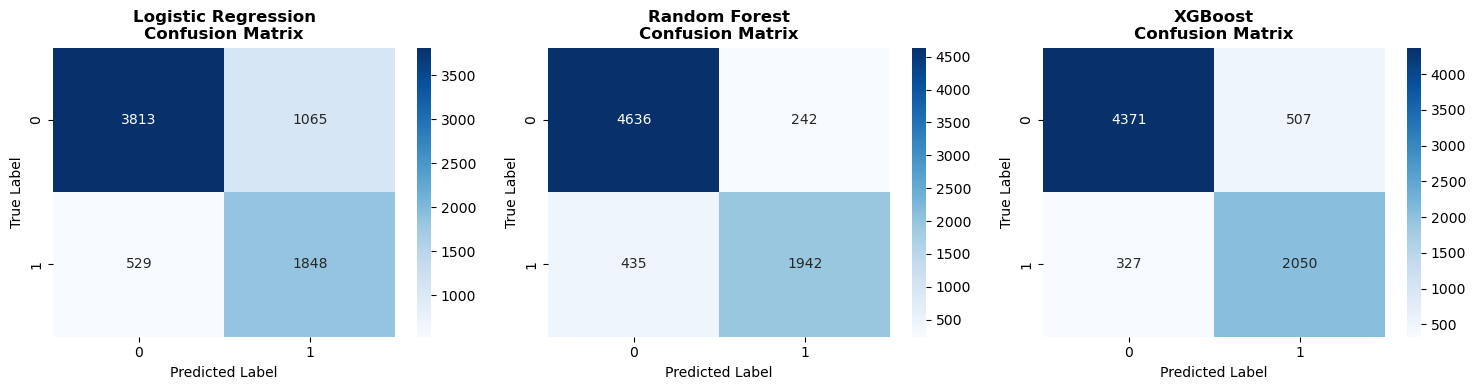

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (name, (y_pred, _)) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name}\nConfusion Matrix', fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

## 7. Feature Importance (Tree-based Models)

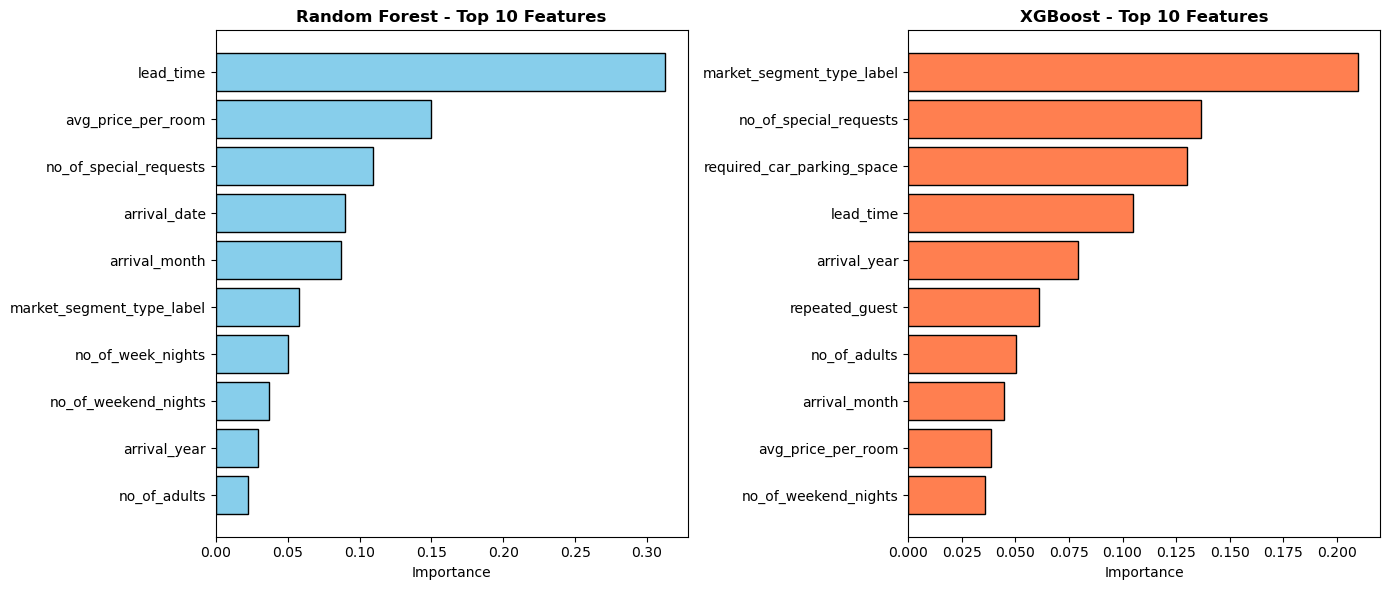

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Random Forest
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

axes[0].barh(rf_importance['feature'], rf_importance['importance'], color='skyblue', edgecolor='black')
axes[0].set_xlabel('Importance')
axes[0].set_title('Random Forest - Top 10 Features', fontweight='bold')
axes[0].invert_yaxis()

# XGBoost
xgb_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

axes[1].barh(xgb_importance['feature'], xgb_importance['importance'], color='coral', edgecolor='black')
axes[1].set_xlabel('Importance')
axes[1].set_title('XGBoost - Top 10 Features', fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## 8. Classification Reports

In [ ]:
for name, (y_pred, _) in models.items():
    print(f"\n{'='*60}")
    print(f"{name} - Classification Report")
    print(f"{'='*60}")
    print(classification_report(y_test, y_pred, target_names=['Not Canceled', 'Canceled']))


Logistic Regression - Classification Report
              precision    recall  f1-score   support

Not Canceled       0.88      0.78      0.83      4878
    Canceled       0.63      0.78      0.70      2377

    accuracy                           0.78      7255
   macro avg       0.76      0.78      0.76      7255
weighted avg       0.80      0.78      0.79      7255


Random Forest - Classification Report
              precision    recall  f1-score   support

Not Canceled       0.91      0.95      0.93      4878
    Canceled       0.89      0.82      0.85      2377

    accuracy                           0.91      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.91      0.91      0.91      7255


XGBoost - Classification Report
              precision    recall  f1-score   support

Not Canceled       0.93      0.90      0.91      4878
    Canceled       0.80      0.86      0.83      2377

    accuracy                           0.89      7255
   macro av

## 9. Save Results

In [ ]:
# Save comparison results
results_df.to_csv('model_comparison_results.csv', index=False)
print("✓ Saved: model_comparison_results.csv")

print("\n" + "="*80)
print("MODEL TRAINING & COMPARISON COMPLETE!")
print("="*80)

✓ Saved: model_comparison_results.csv

MODEL TRAINING & COMPARISON COMPLETE!


## 10. Summary

### Best Model Selection:
Based on the results above, select the best model considering:
- **Highest Accuracy**: Overall correctness
- **Best F1-Score**: Balanced precision and recall
- **Best ROC-AUC**: Overall discrimination ability

### Typical Performance Ranking:
1. **XGBoost** - Usually best overall performance
2. **Random Forest** - Good performance with interpretability
3. **Logistic Regression** - Solid baseline, fastest training

### Recommendations:
- Use **XGBoost** for production (best performance)
- Use **Random Forest** for explainability
- Use **Logistic Regression** for quick baseline